In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\programming\models\regression\advanced_house\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
miss_col=[val for val in df.columns if df[val].isnull().sum()>0]
for i in miss_col:
    print(i,np.round(df[i].isnull().mean(),4),"% missing values")

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


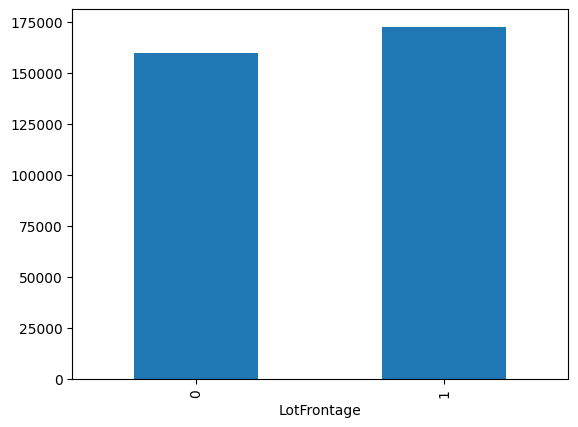

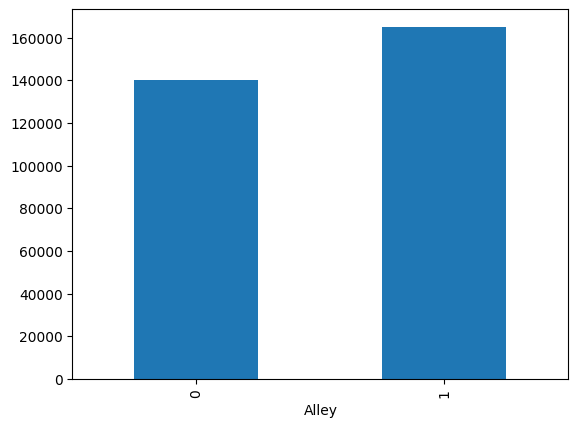

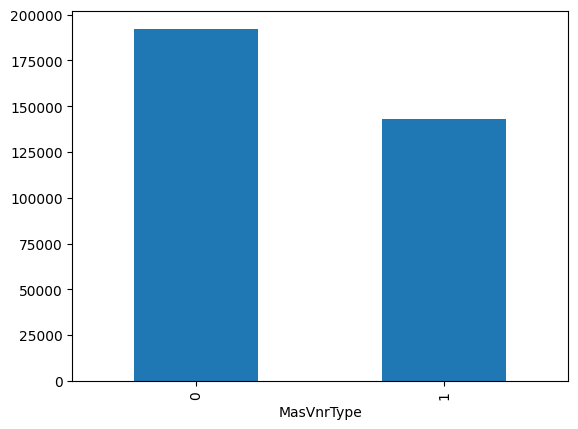

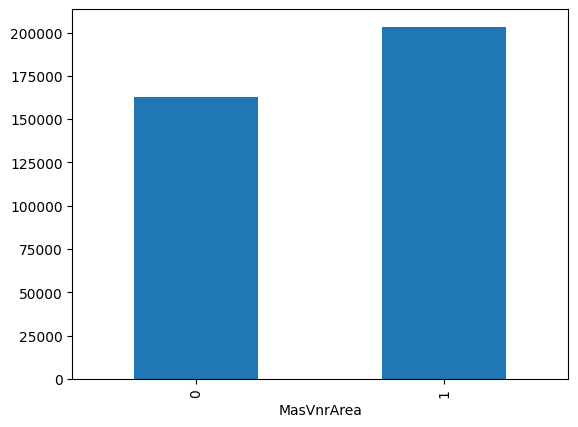

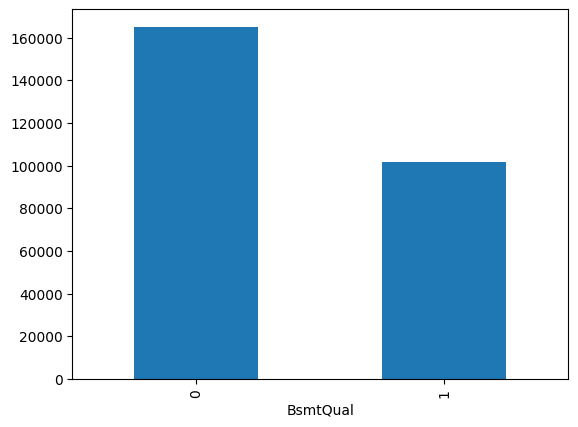

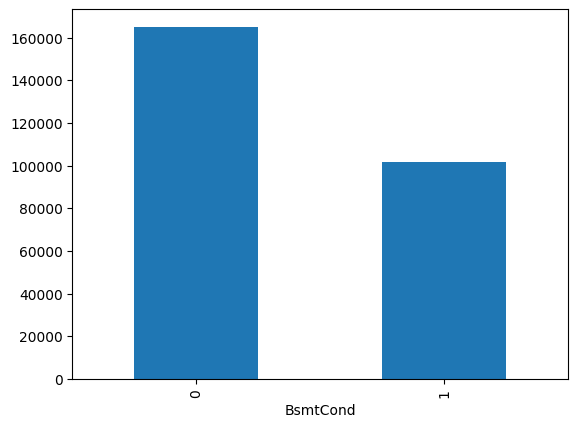

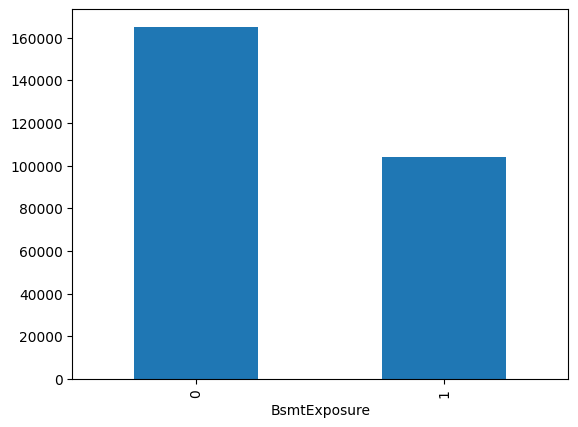

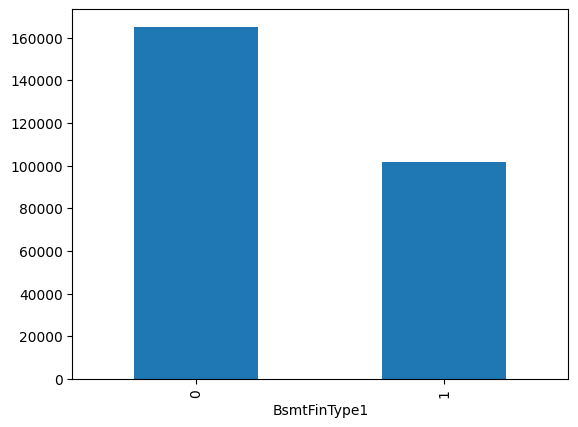

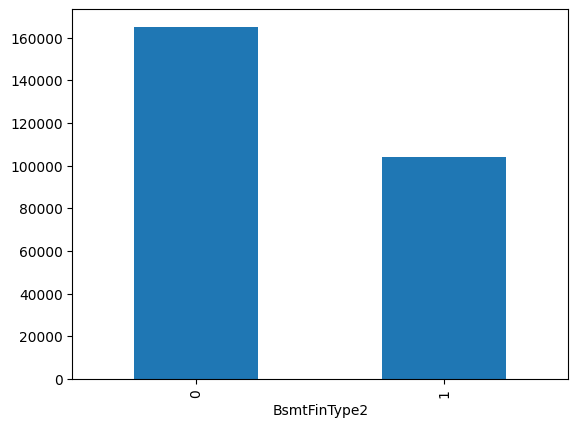

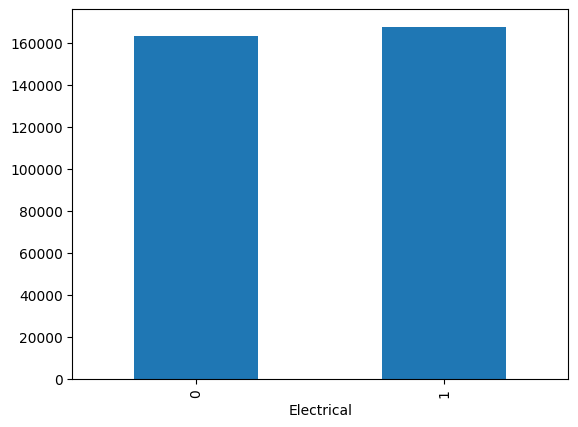

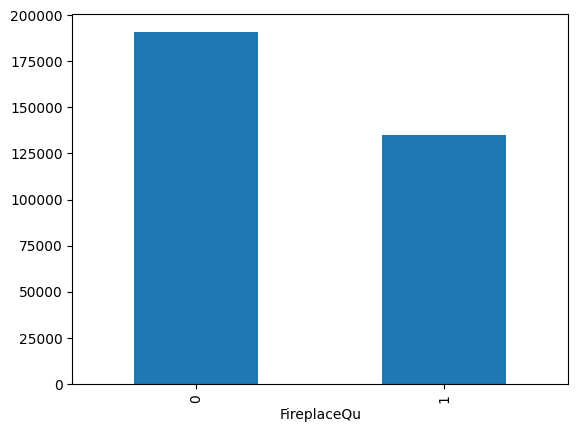

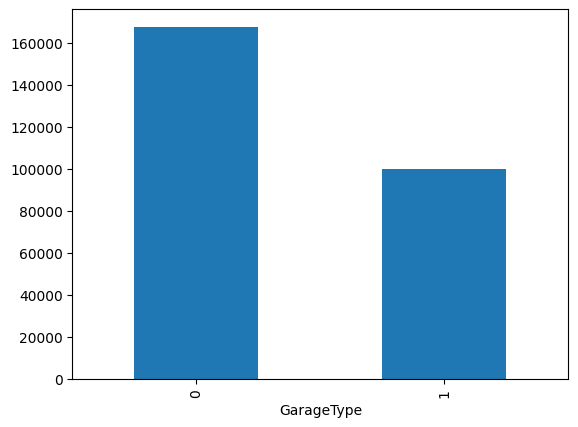

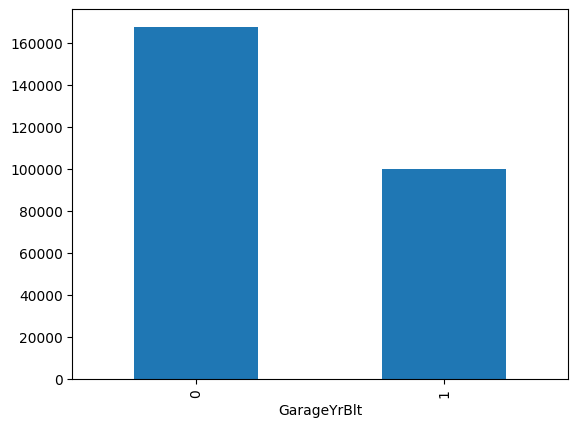

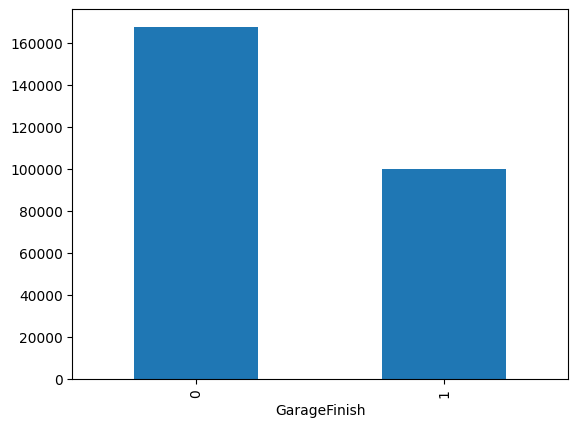

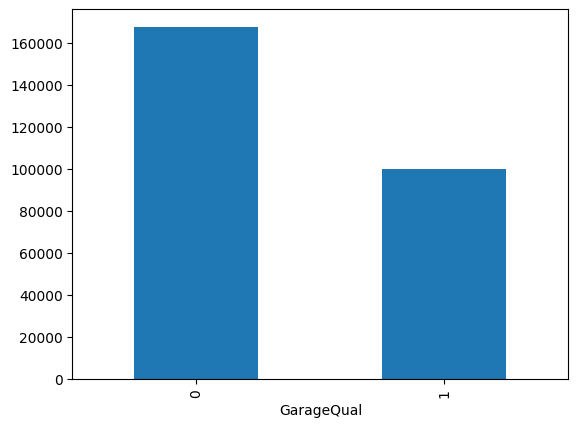

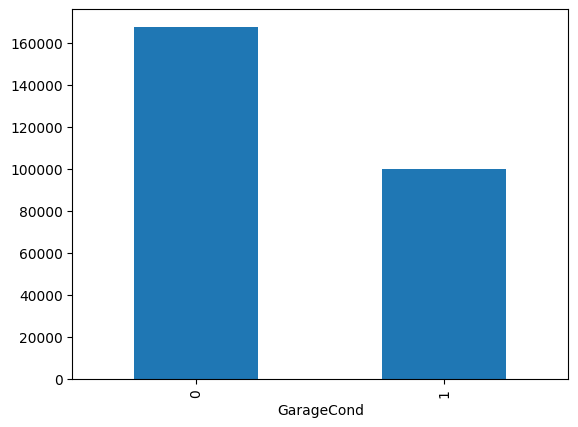

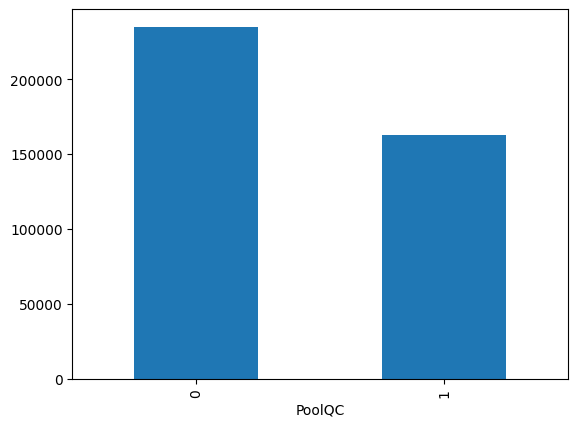

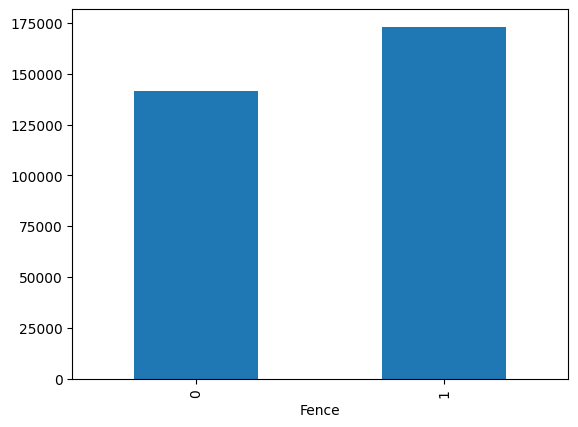

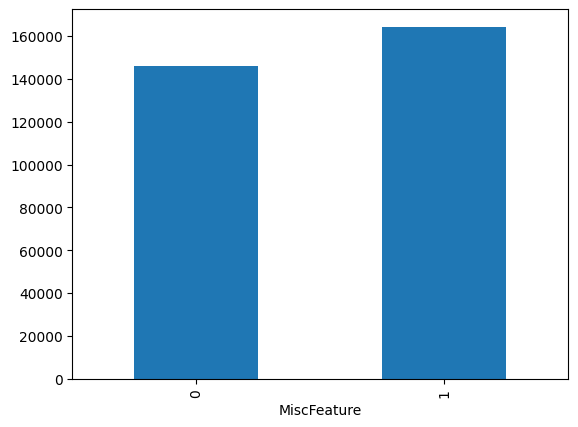

In [5]:
for i in miss_col:
    dataset=df.copy()
    dataset[i]=np.where(df[i].isnull(),1,0)
    dataset.groupby(i)['SalePrice'].median().plot.bar()
    plt.show()

In [6]:
num_col=list(col for col in df.columns if df[col].dtype!='object')
print(num_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


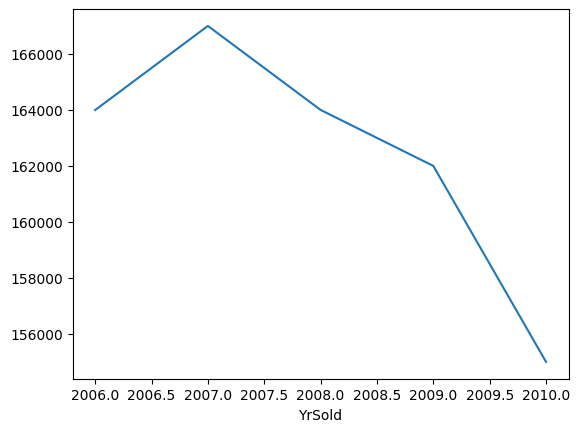

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [7]:
yr_col=[y for y in df.columns  if 'Year' in y or 'Yr' in y]
df.groupby('YrSold')['SalePrice'].median().plot()
plt.show()
print(yr_col)

Prices of houses has been decreasing for past 4 years

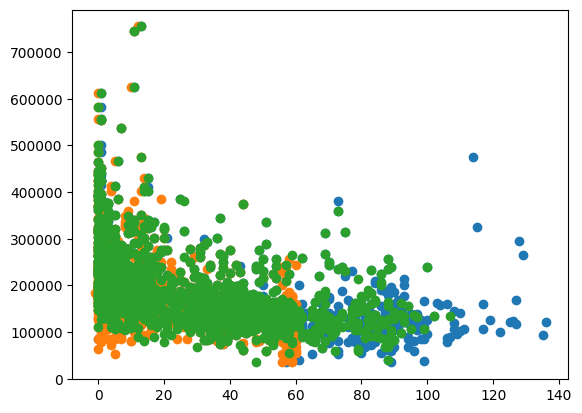

In [8]:
for i in yr_col:
    if i!='YrSold':
        dataset=df.copy()
        dataset[i]=dataset['YrSold']-dataset[i]
        plt.scatter(dataset[i],dataset['SalePrice'])

Price of houses has decreased as time is increased(price is directly proprtional to time)

In [9]:
dis_col=[n for n in num_col if len(df[n].unique())<25 and n not in yr_col+['id']]
print(dis_col)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [10]:
df[dis_col].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [11]:
df[dis_col].describe()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,5.844521,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,3.409589,2.758904,43.489041,6.321918
std,42.300571,1.382997,1.112799,48.623081,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,29.317331,40.177307,496.123024,2.703626
min,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000
50%,50.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000
75%,70.000000,7.000000,6.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,0.000000,0.000000,0.000000,8.000000
max,190.000000,10.000000,9.000000,572.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,508.000000,738.000000,15500.000000,12.000000


MSSubClass


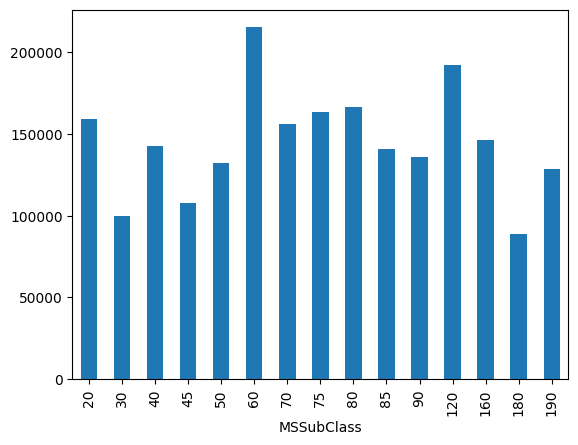

OverallQual


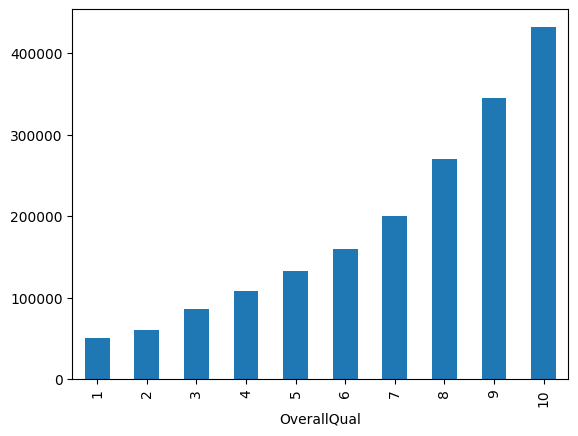

OverallCond


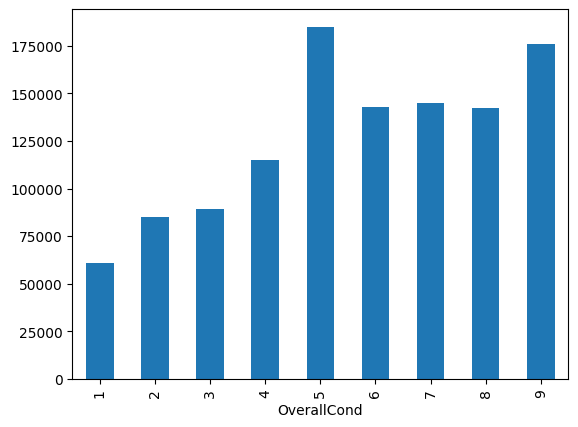

LowQualFinSF


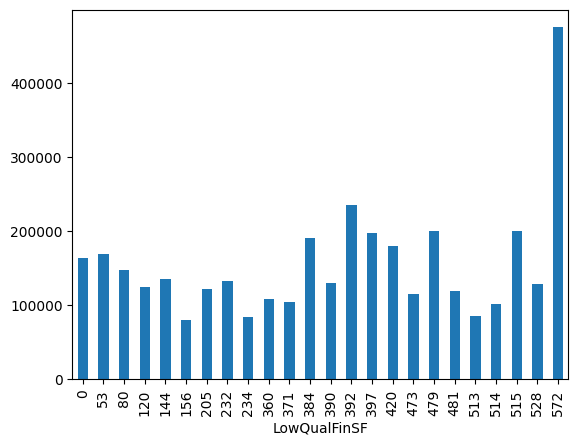

BsmtFullBath


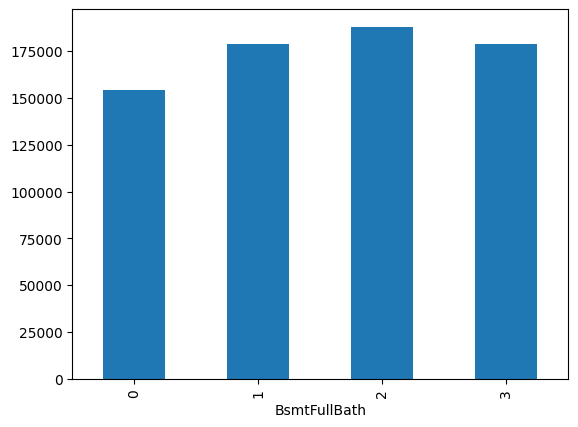

BsmtHalfBath


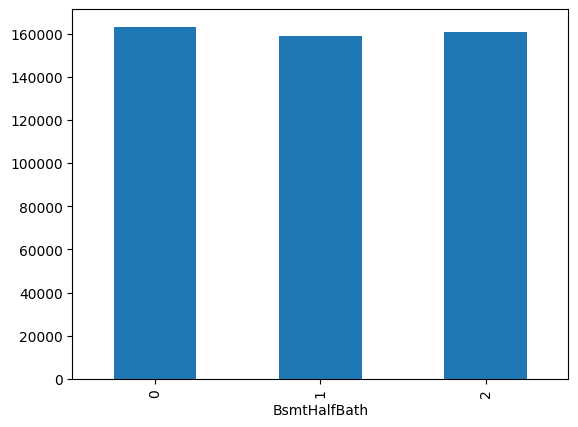

FullBath


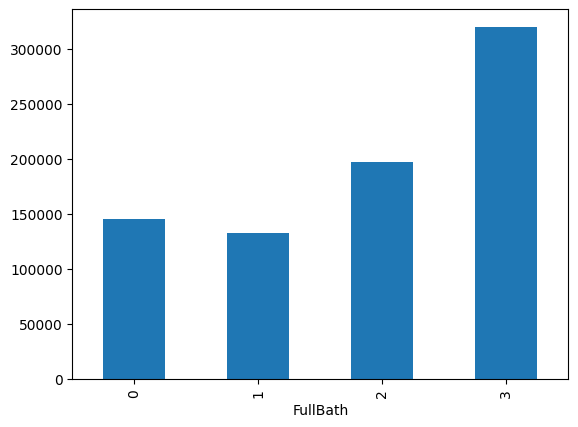

HalfBath


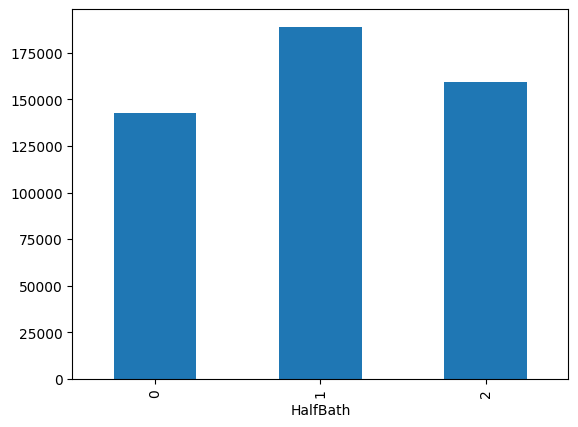

BedroomAbvGr


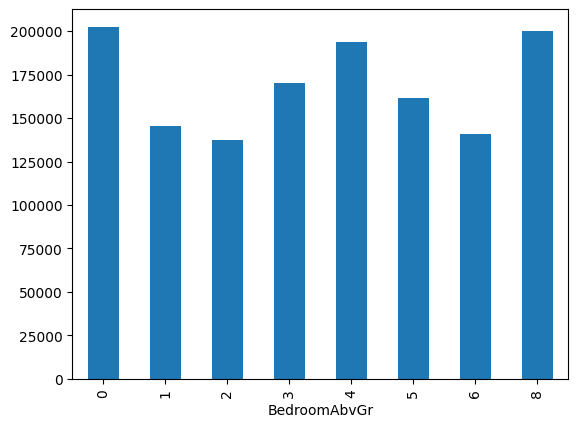

KitchenAbvGr


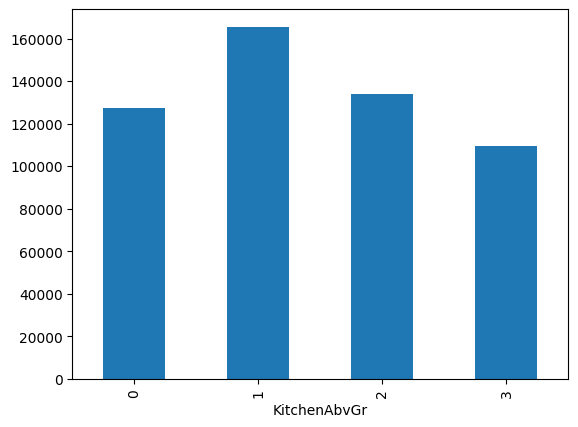

TotRmsAbvGrd


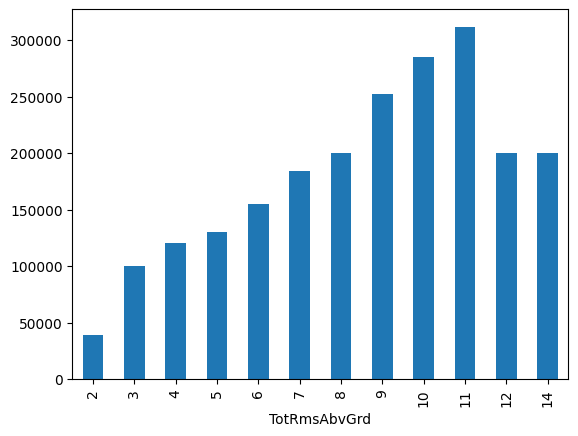

Fireplaces


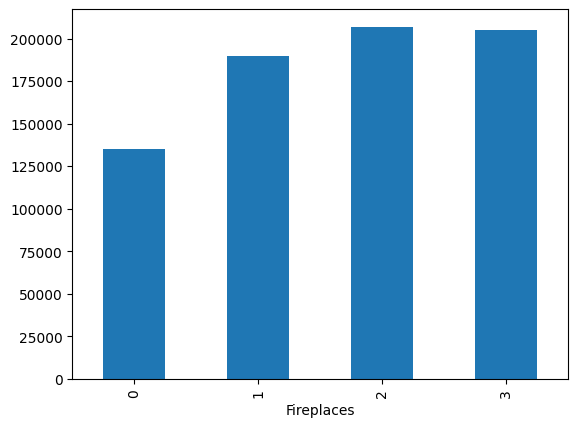

GarageCars


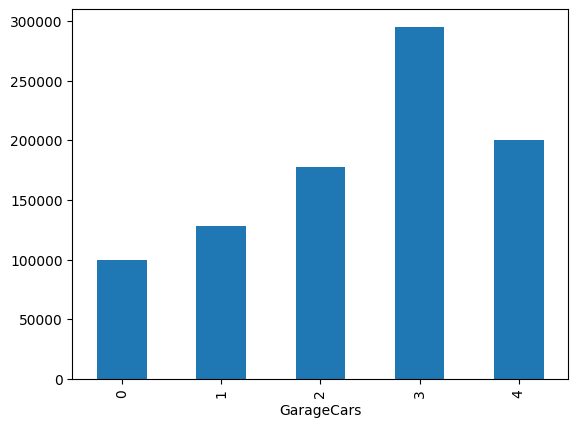

3SsnPorch


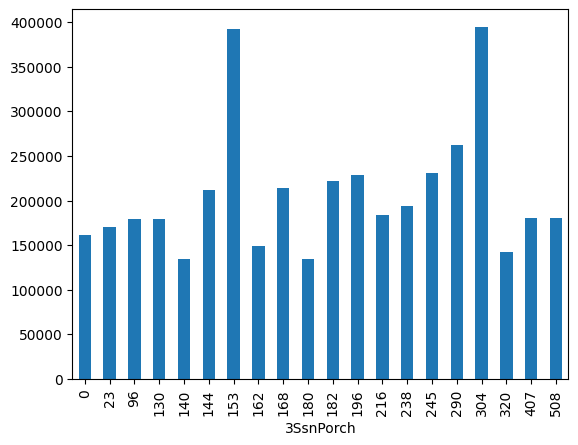

PoolArea


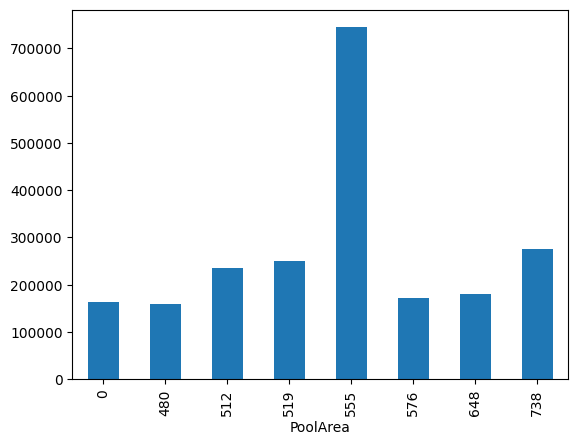

MiscVal


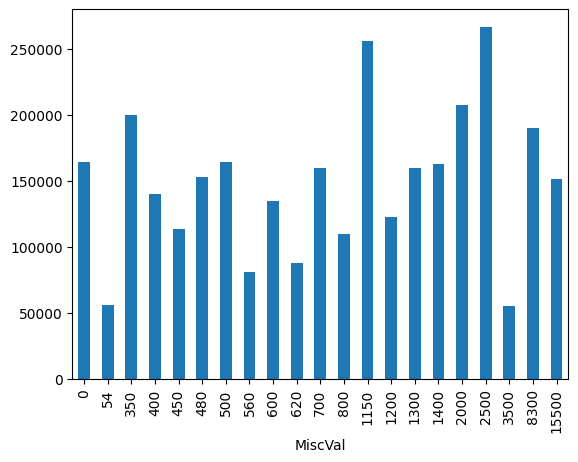

MoSold


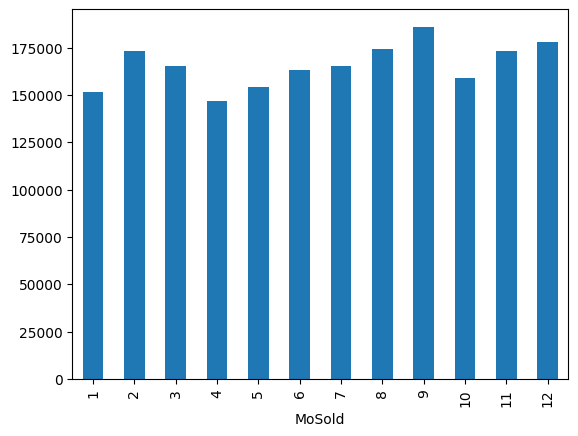

In [12]:
for i in dis_col:
    dataset=df.copy()
    print(i)
    dataset.groupby(i)['SalePrice'].median().plot.bar()
    plt.show()

In [13]:
continous_col=[m for m in num_col if m not in dis_col and m!='Id']
print(continous_col)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'SalePrice']


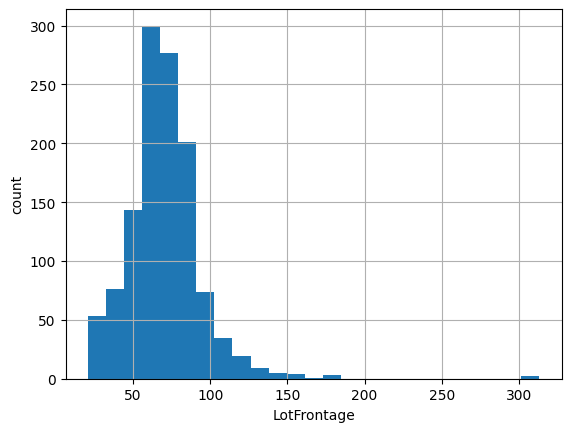

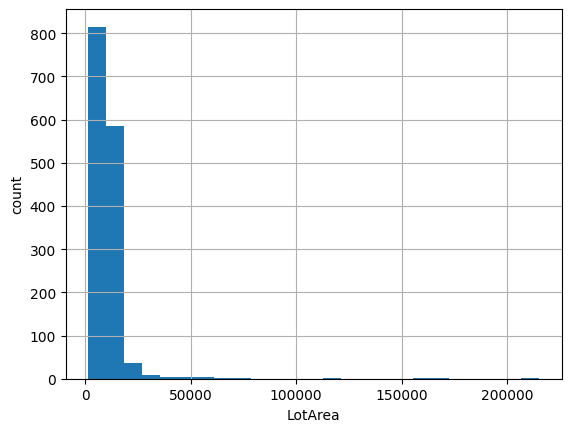

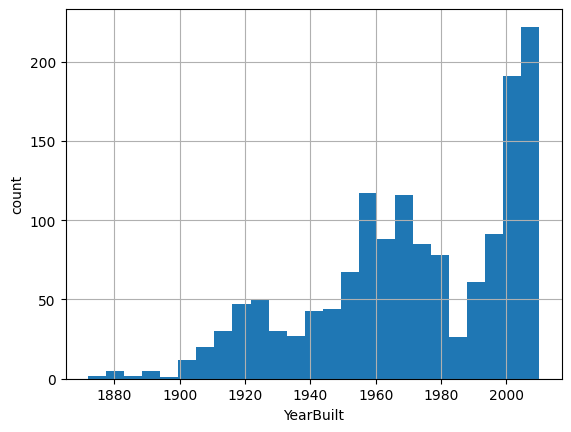

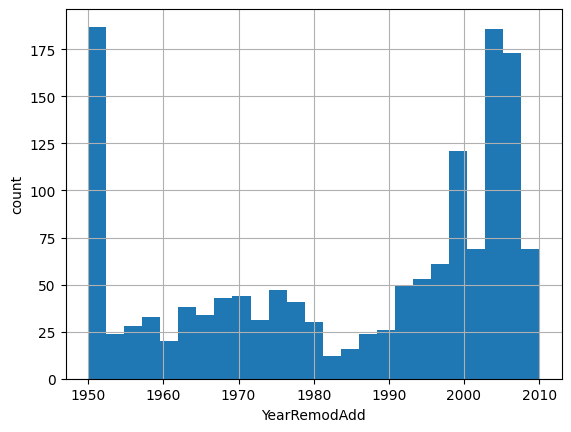

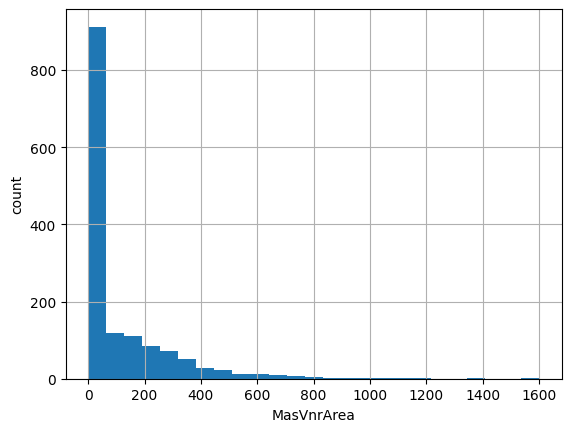

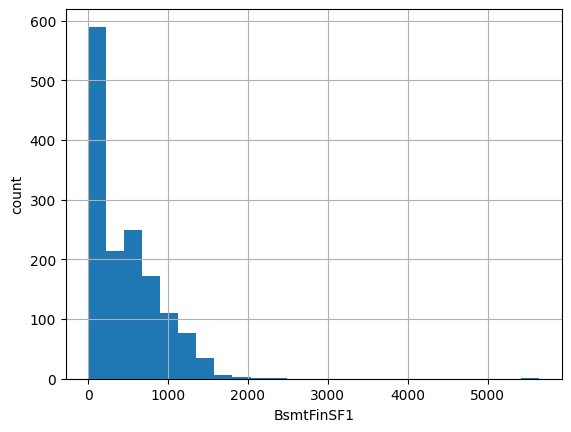

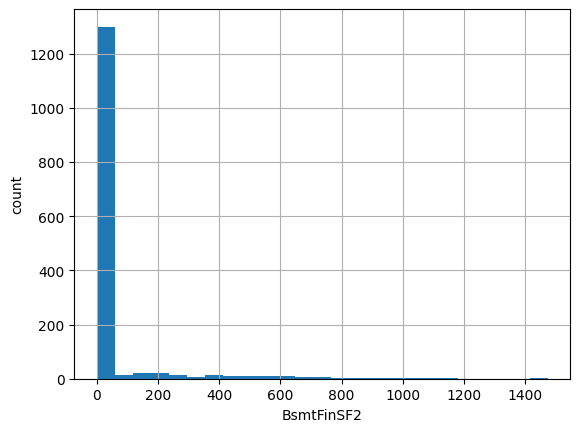

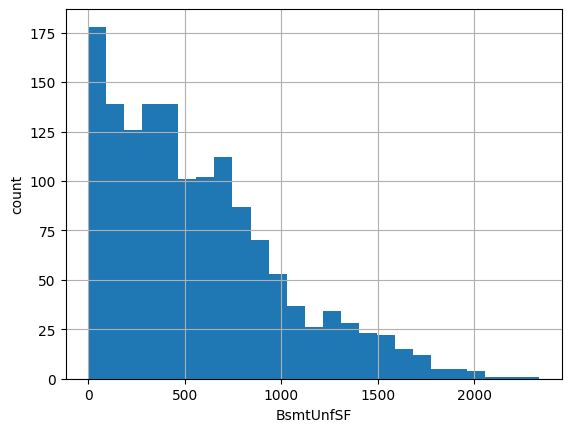

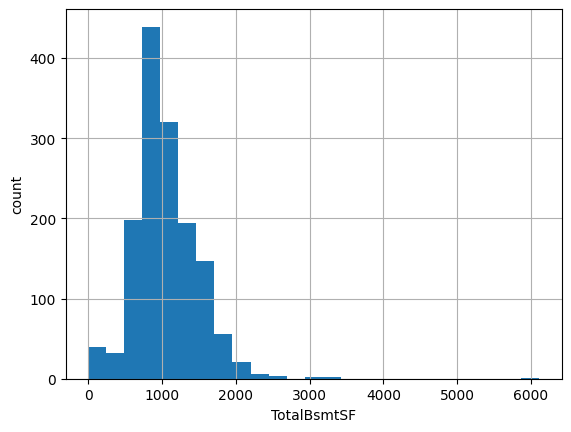

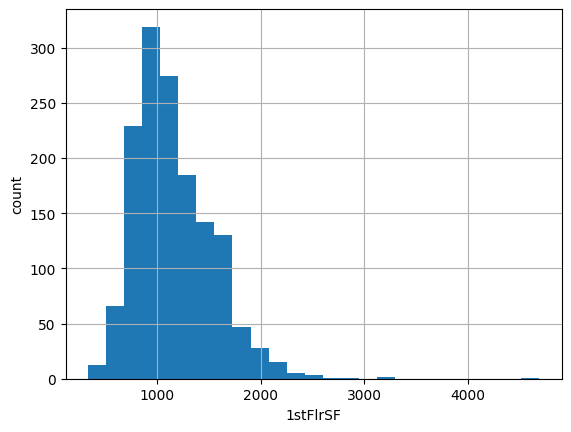

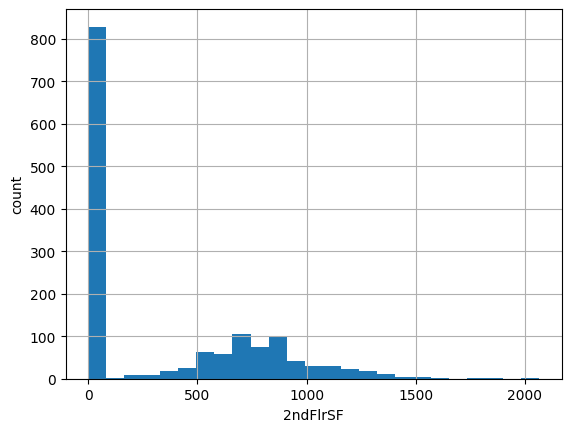

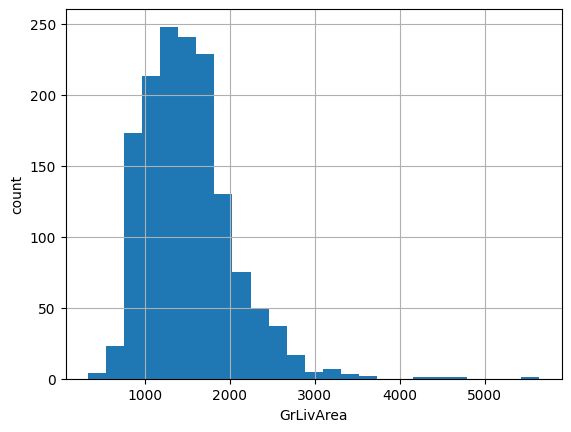

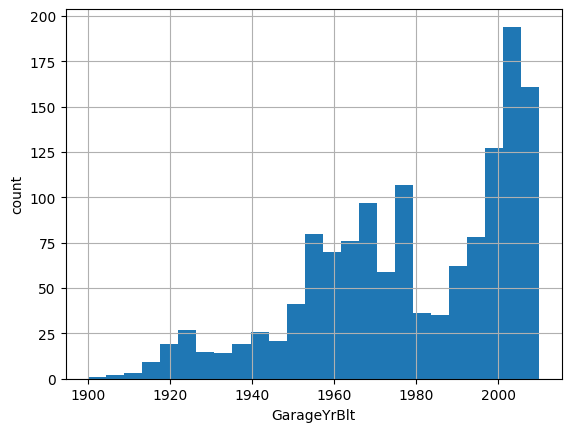

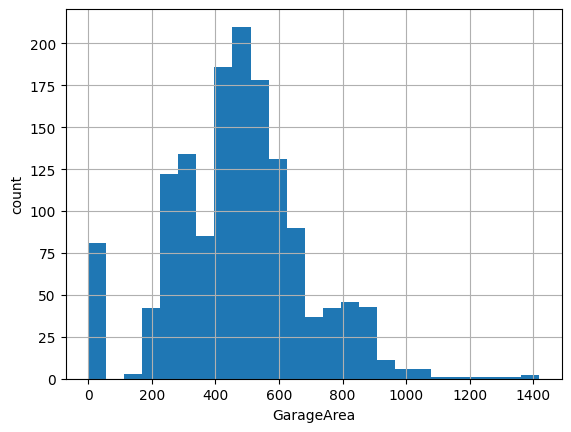

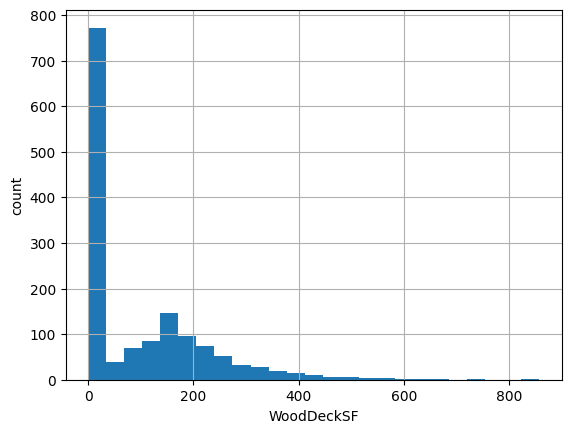

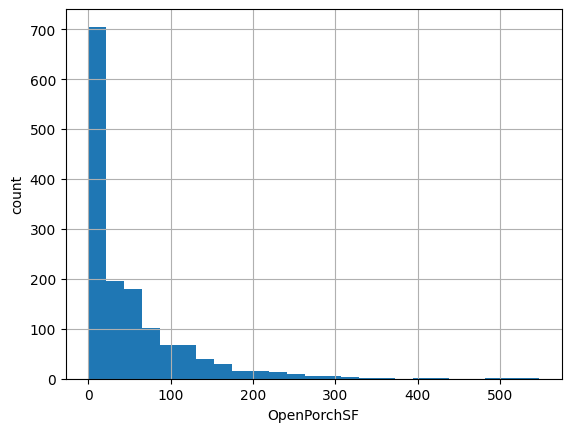

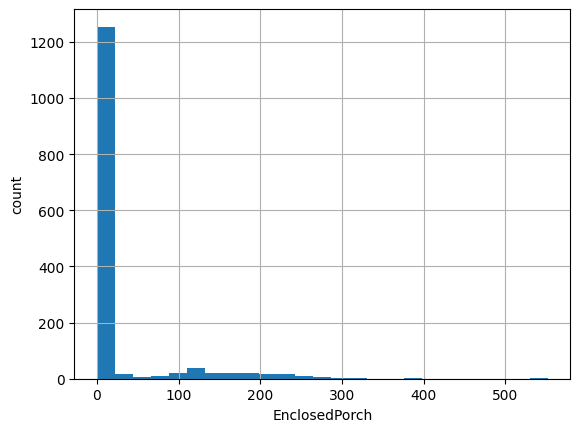

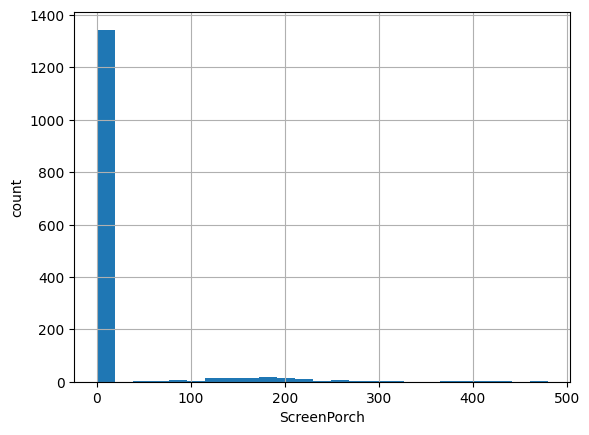

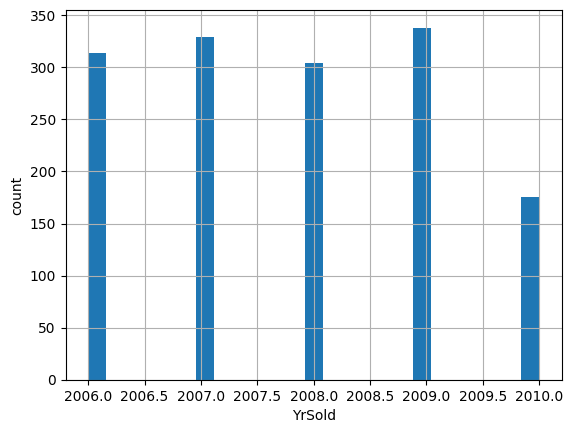

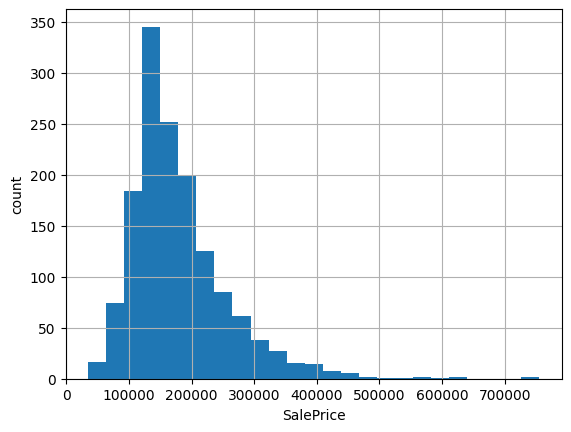

In [14]:
for i in continous_col:
    dataset=df.copy()
    dataset[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

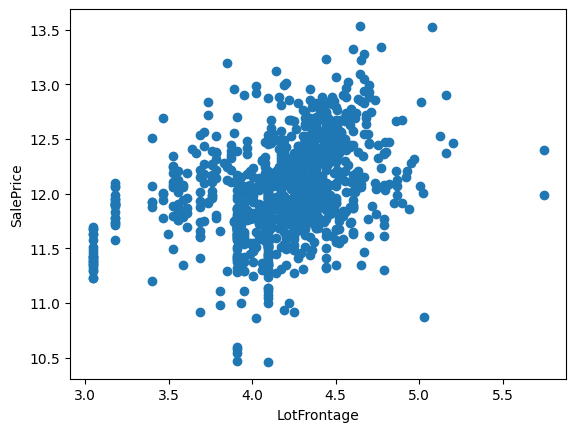

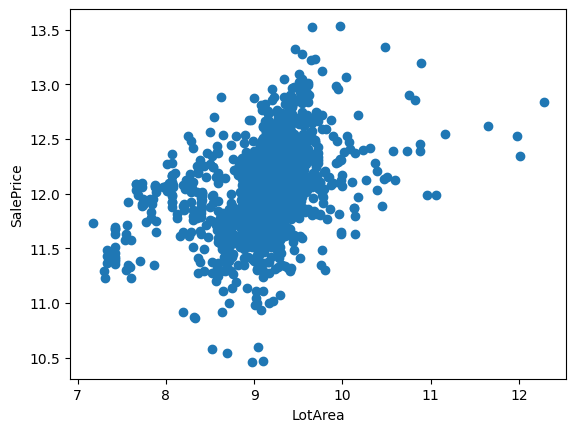

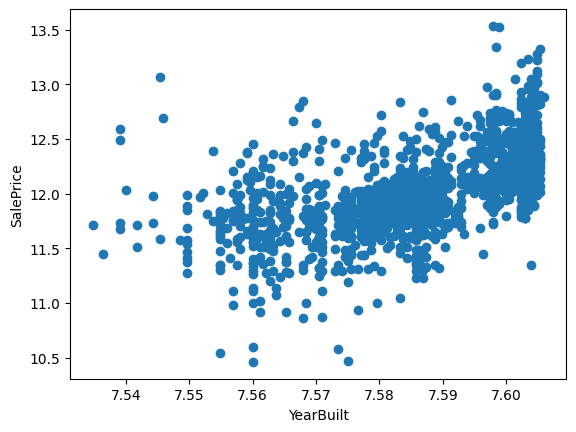

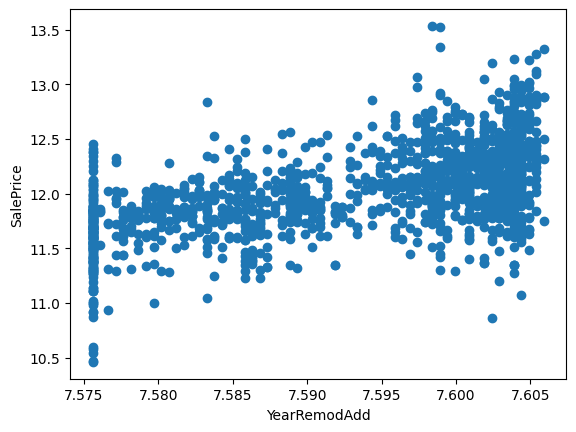

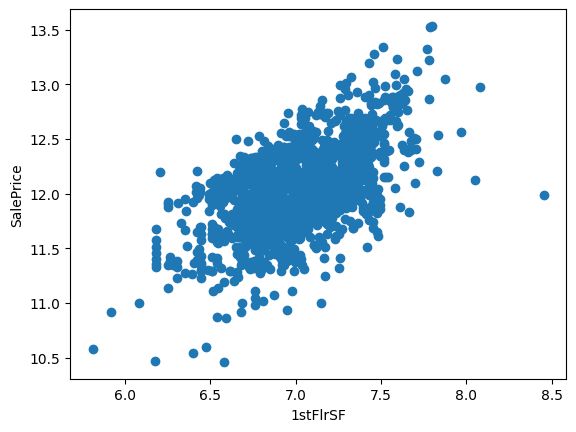

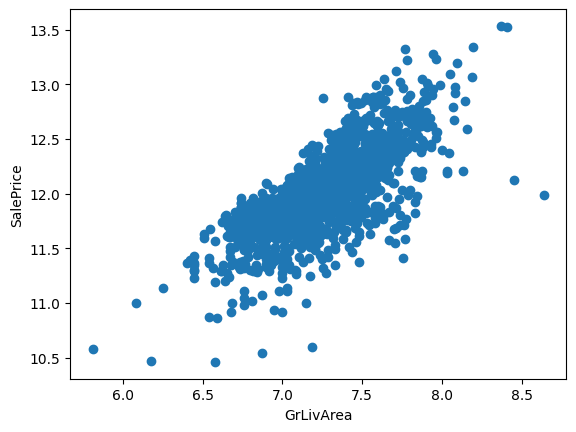

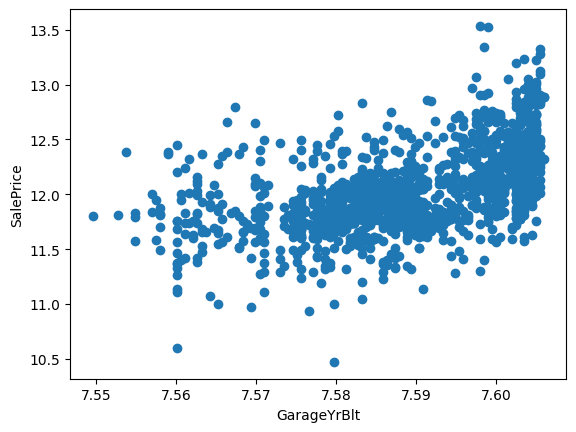

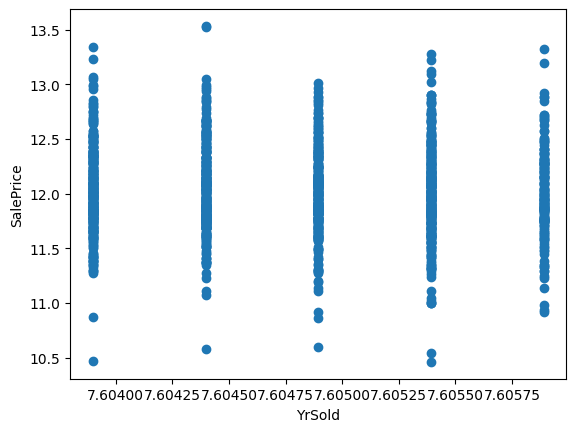

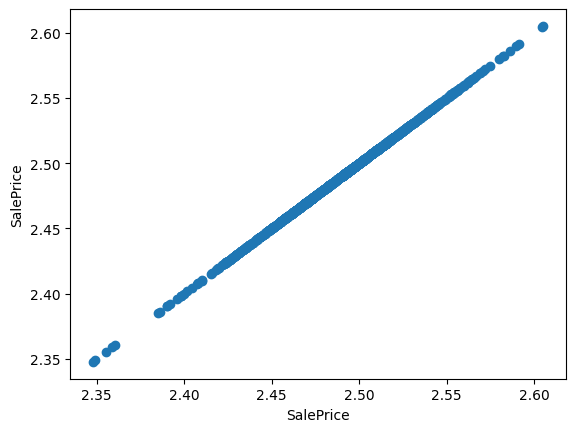

In [15]:
for i in continous_col:
    dataset=df.copy()
    if 0 in dataset[i].unique():
        pass
    else:
        dataset[i]=np.log(dataset[i])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(dataset[i],dataset['SalePrice'])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.show()


GrLiv area->positive correlation

1stFirlf->positive correlation

OUTLIERS

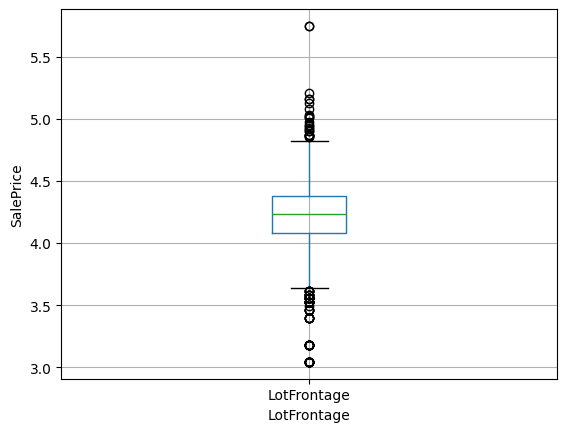

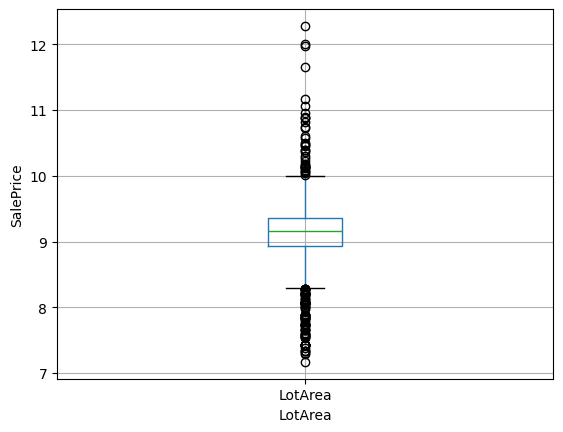

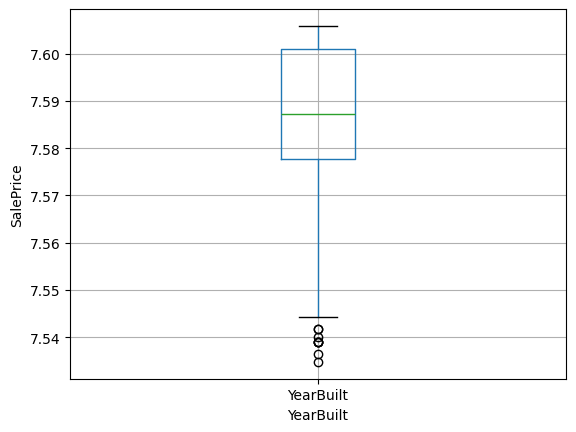

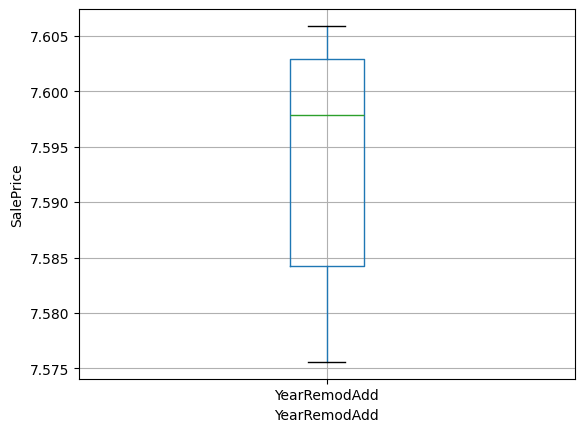

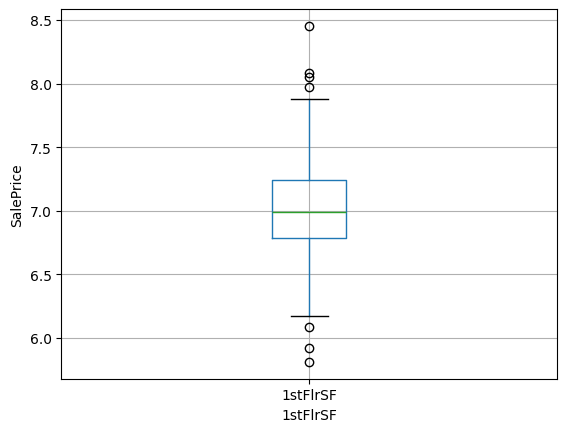

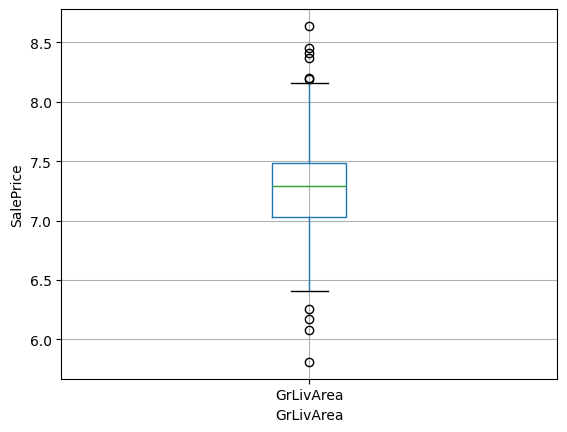

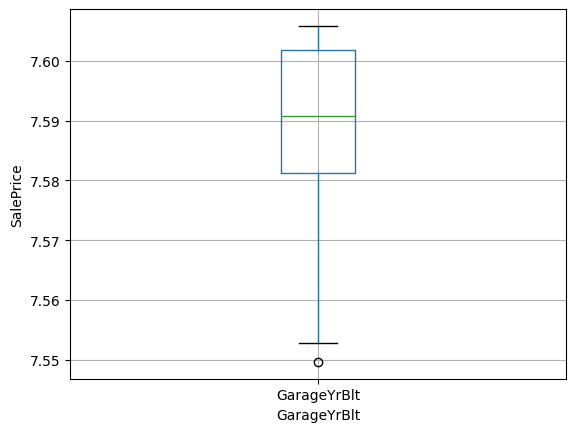

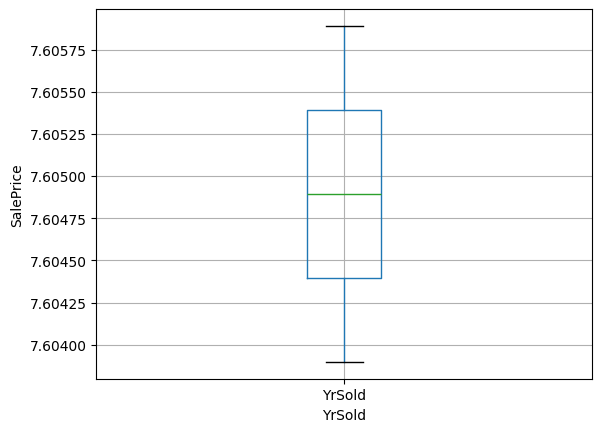

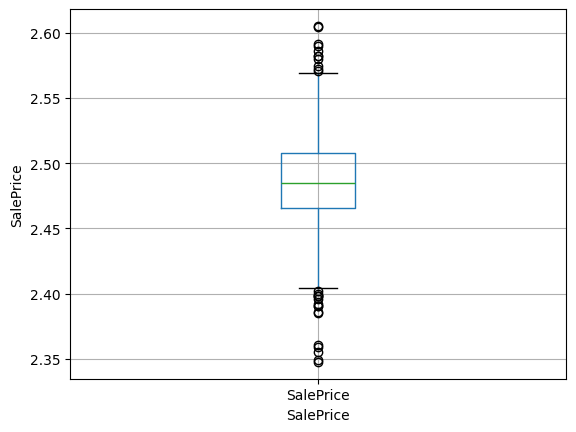

In [16]:
for i in continous_col:
    dataset=df.copy()
    if 0 in dataset[i].unique():
        pass
    else:
        dataset[i]=np.log(dataset[i])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        dataset.boxplot(column=i)
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

In [17]:
categorical_col=[c for c in df.columns if df[c].dtypes=="O"]
print(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


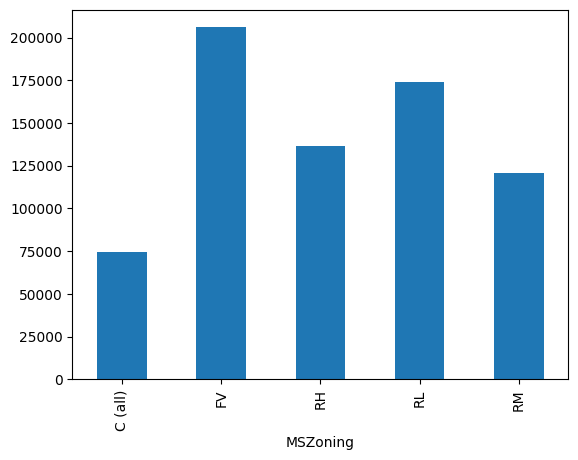

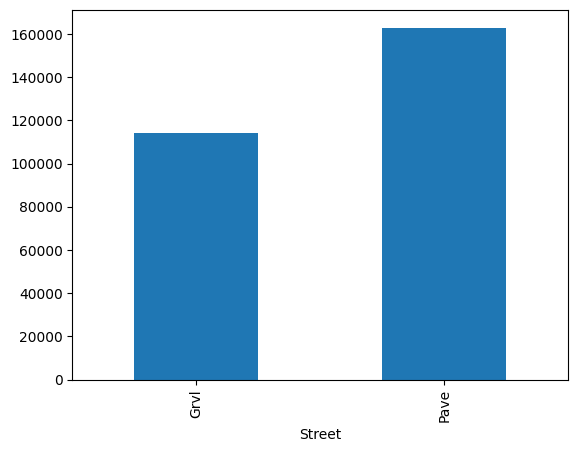

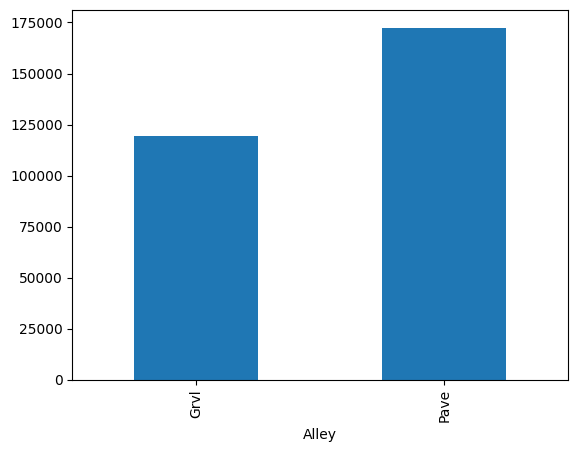

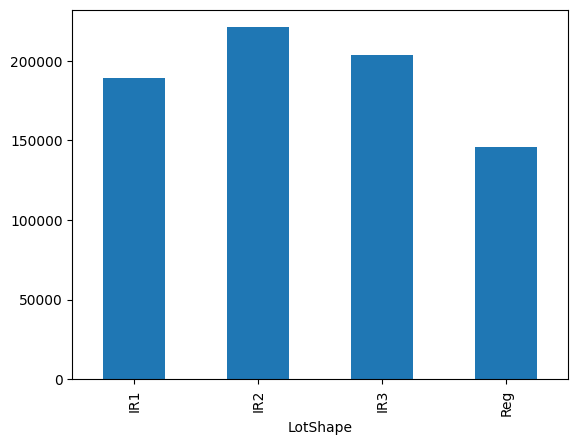

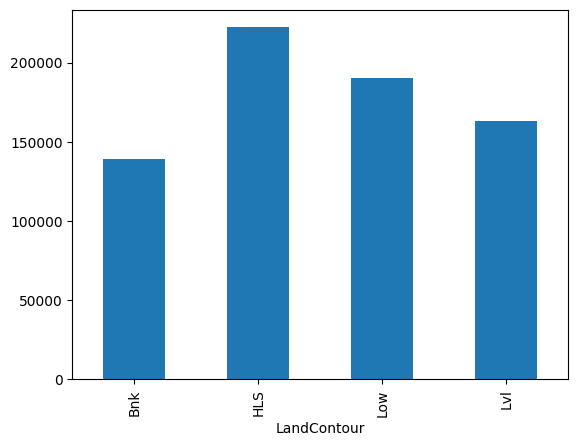

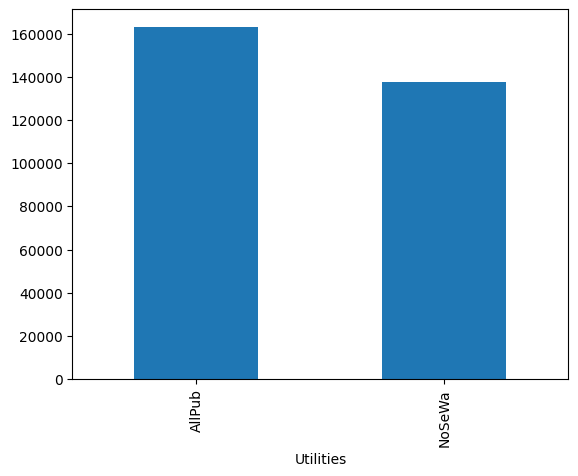

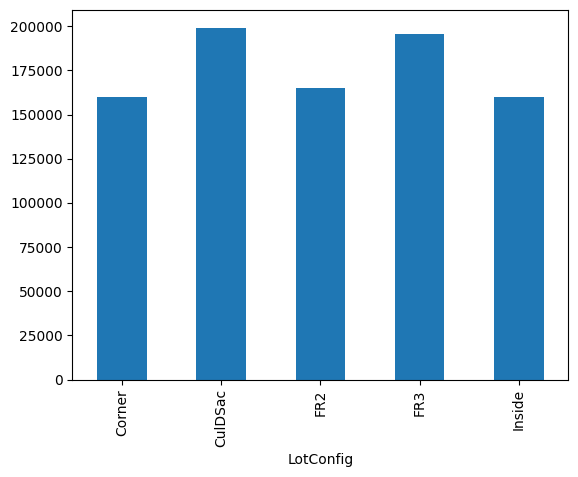

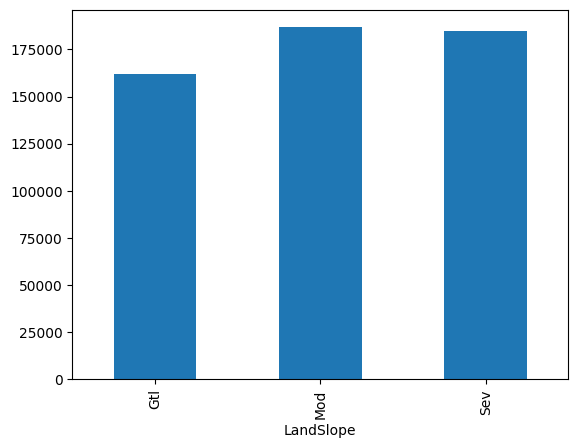

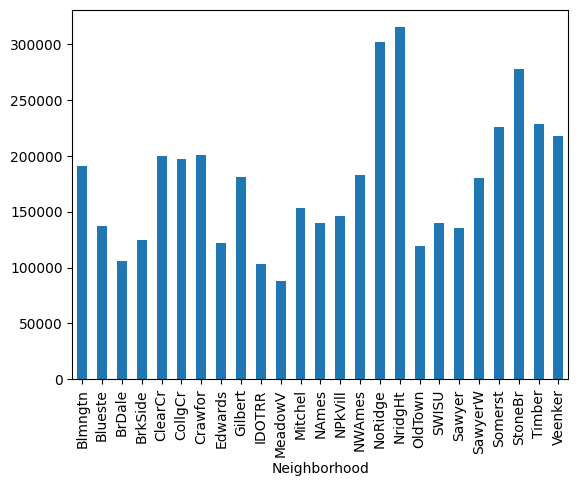

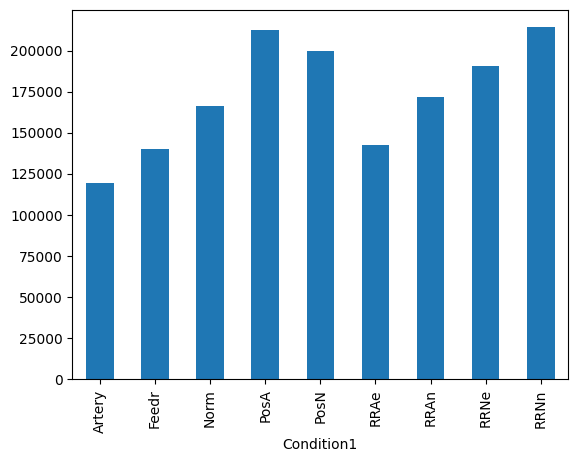

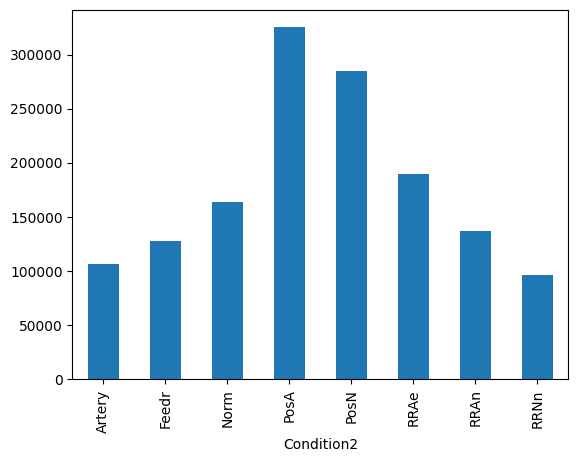

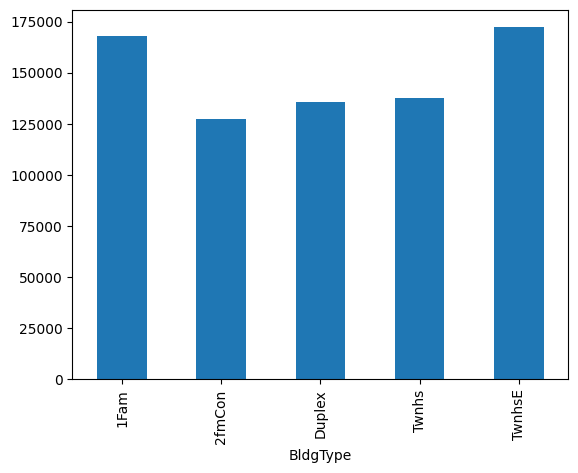

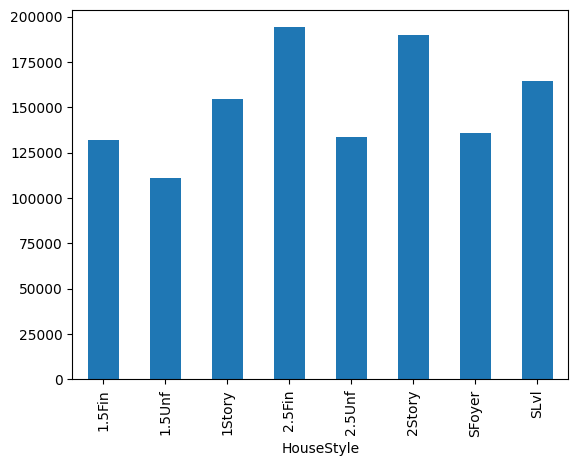

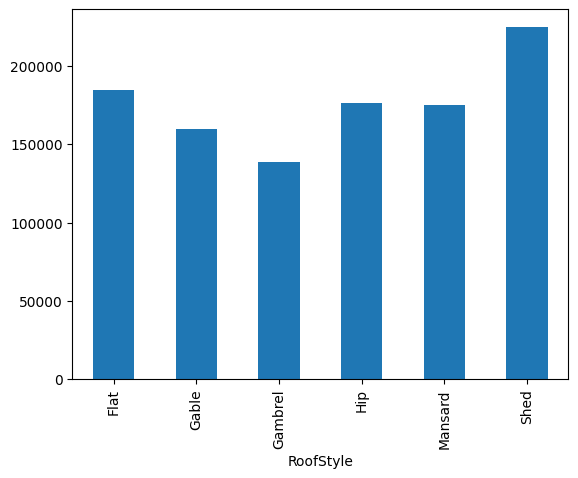

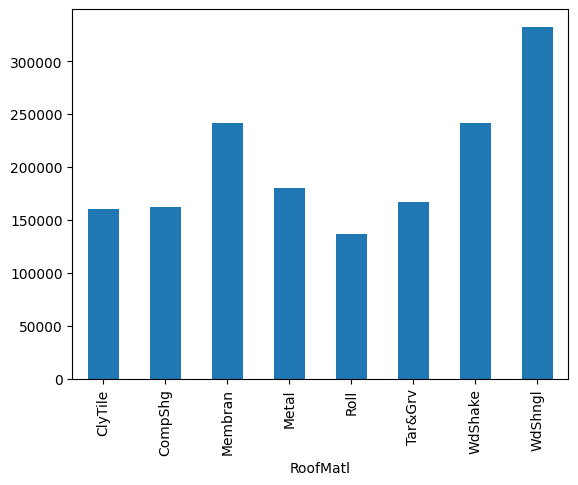

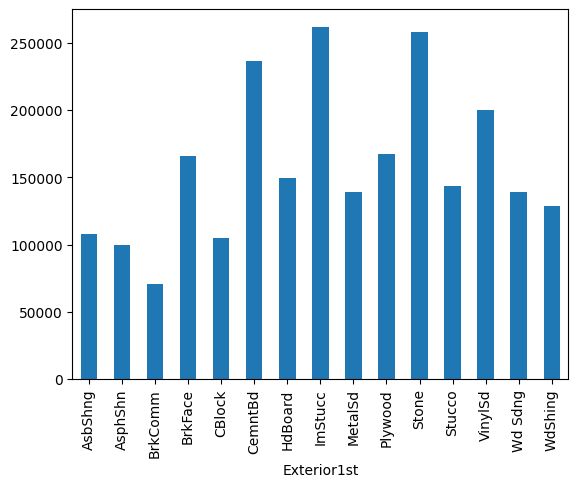

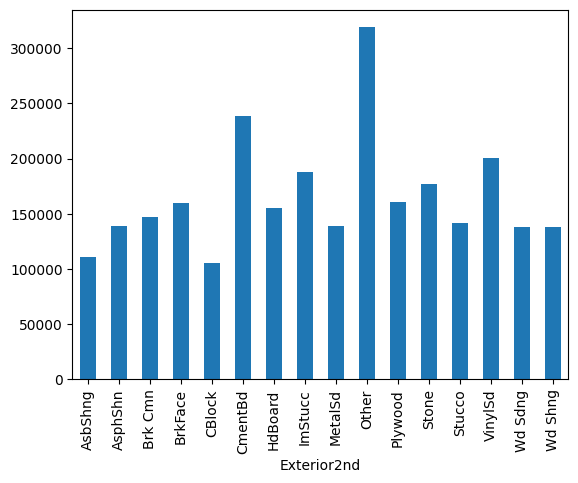

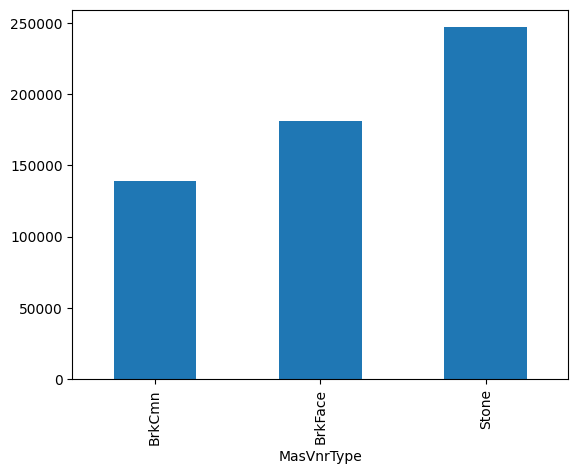

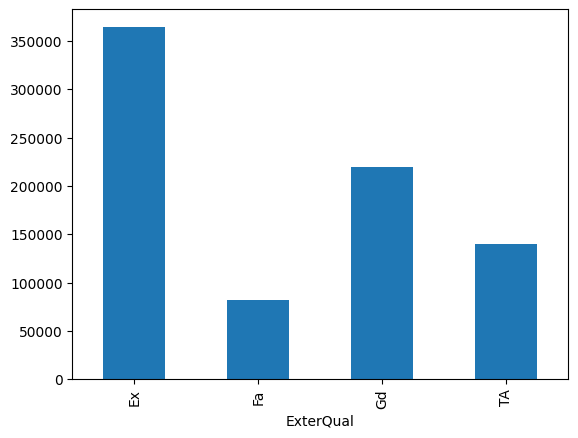

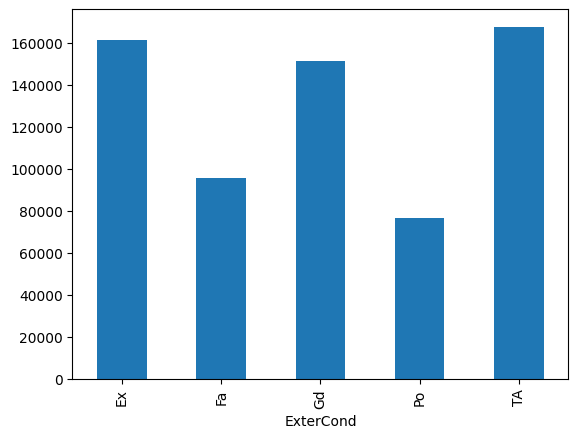

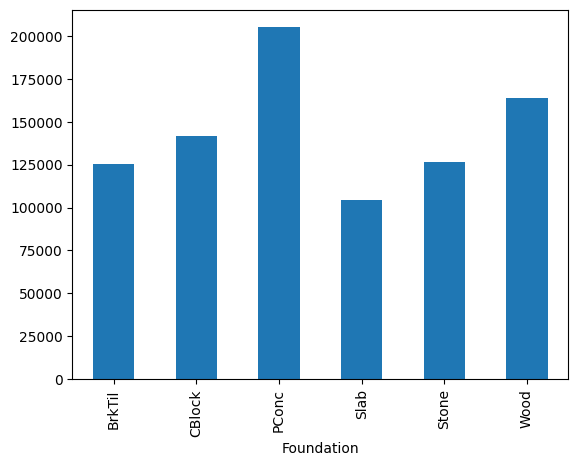

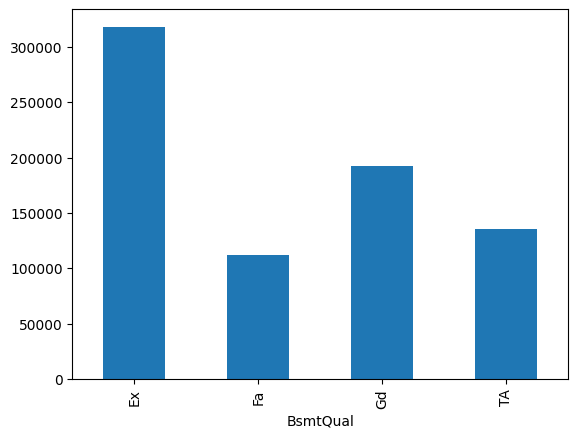

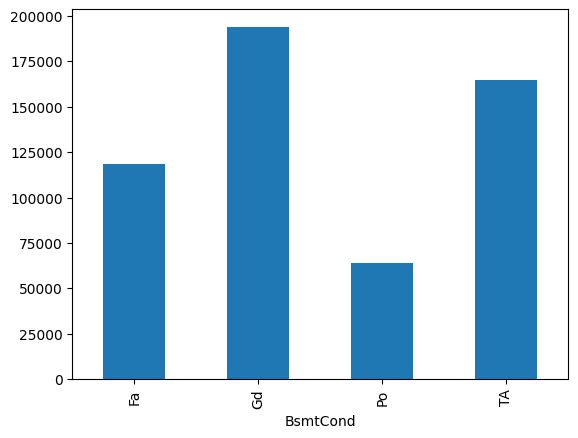

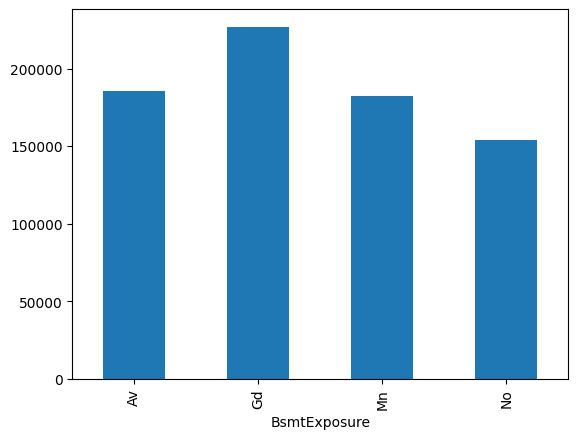

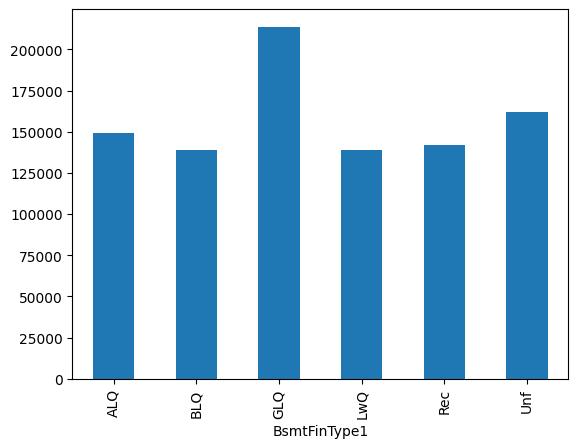

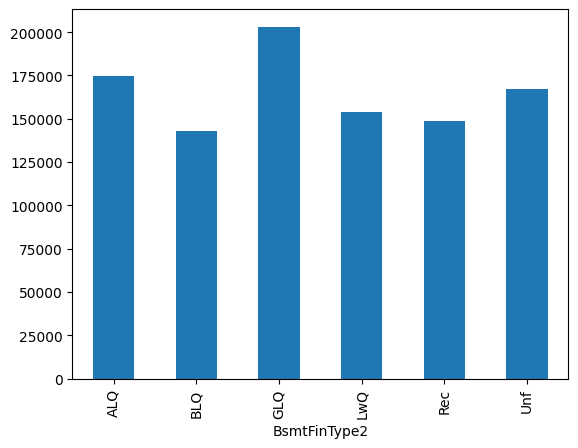

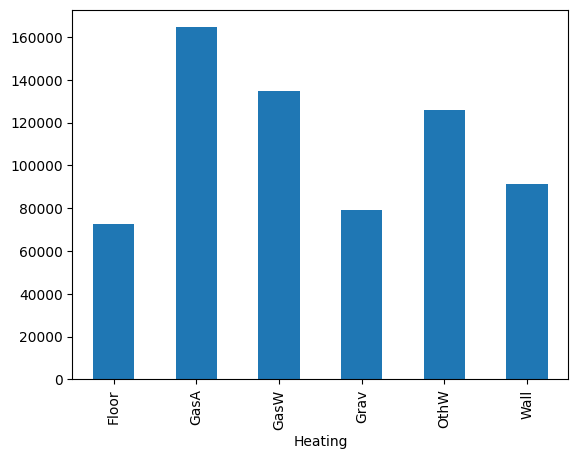

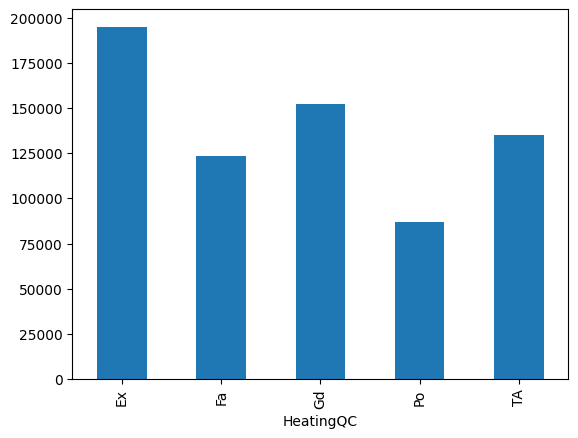

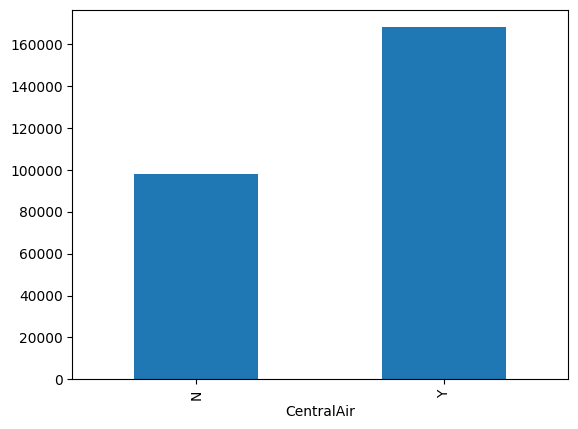

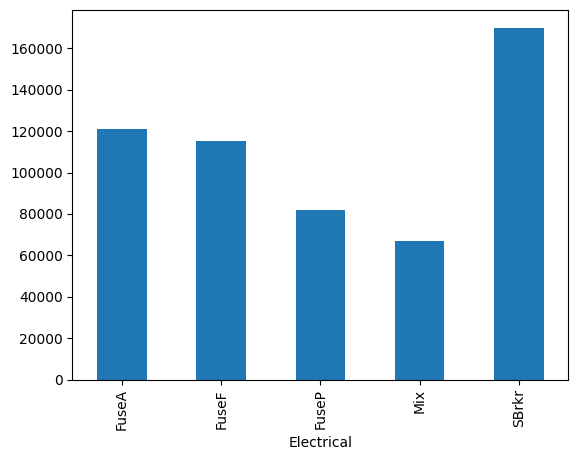

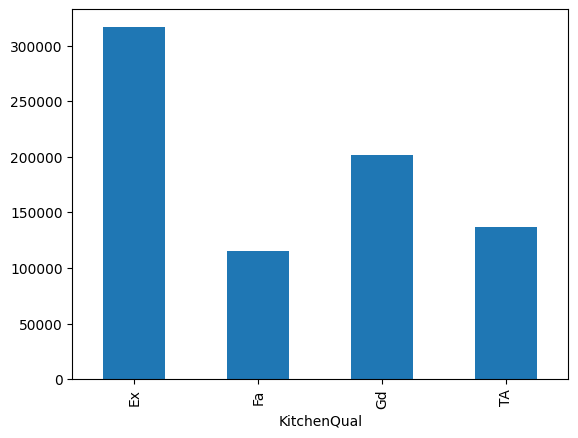

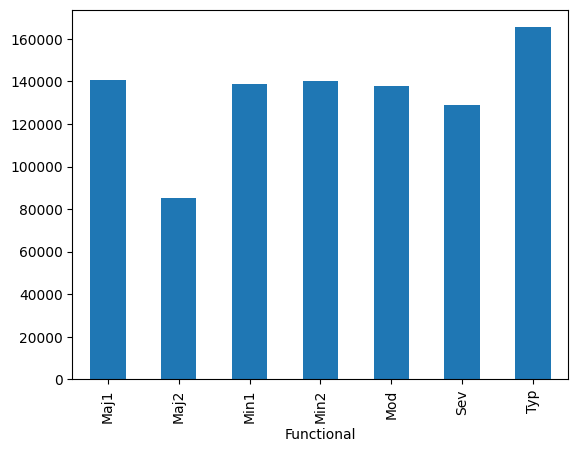

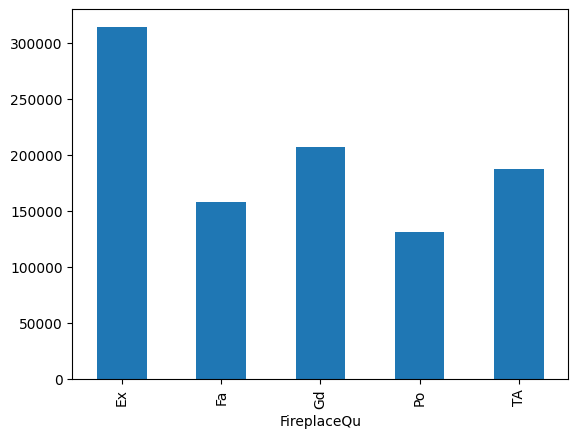

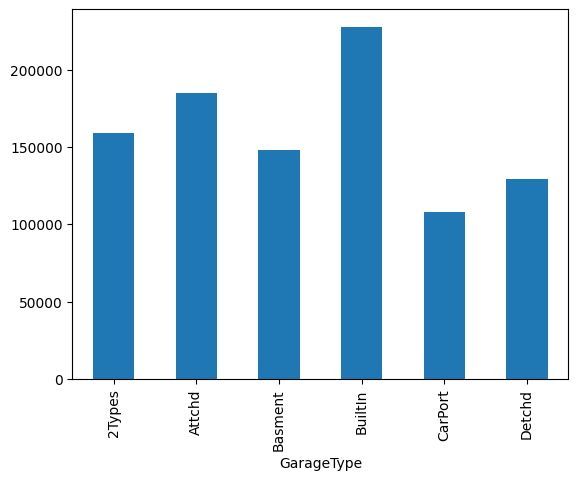

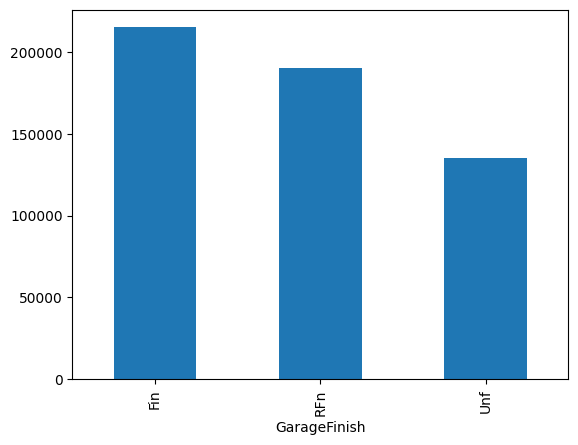

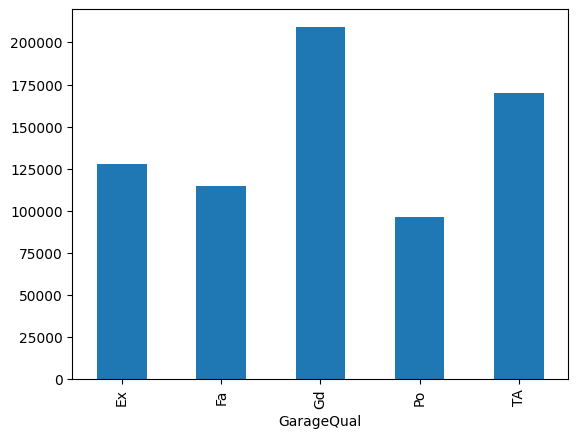

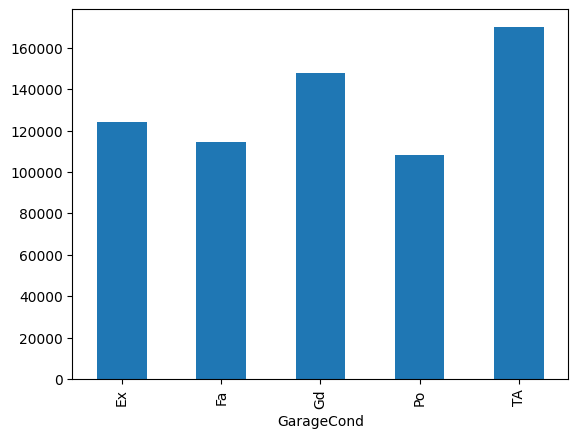

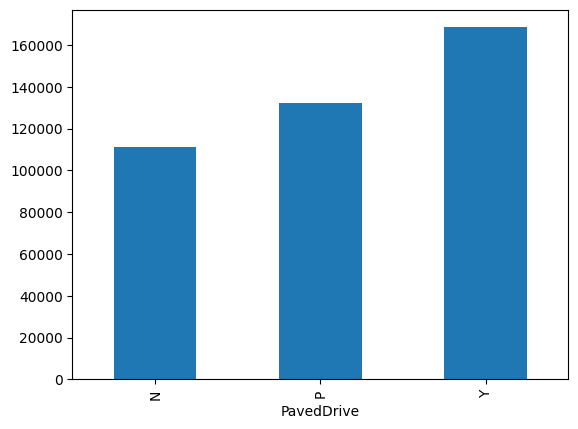

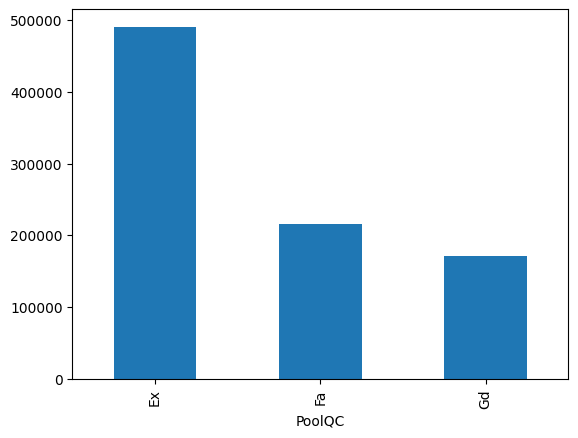

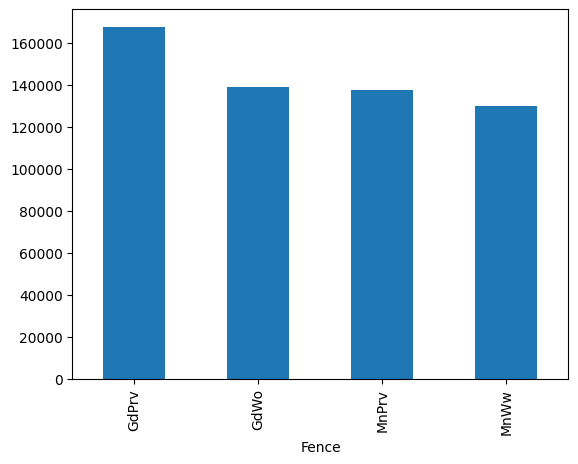

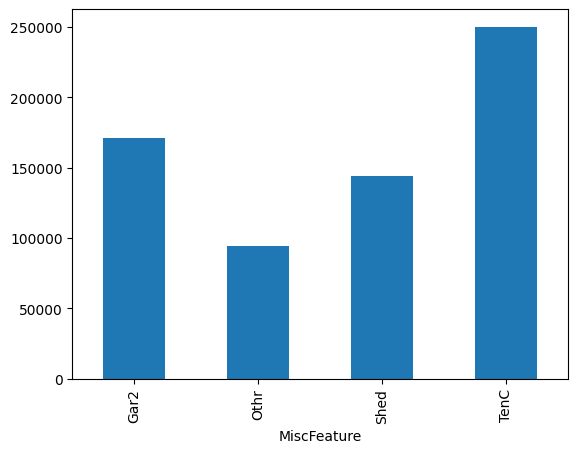

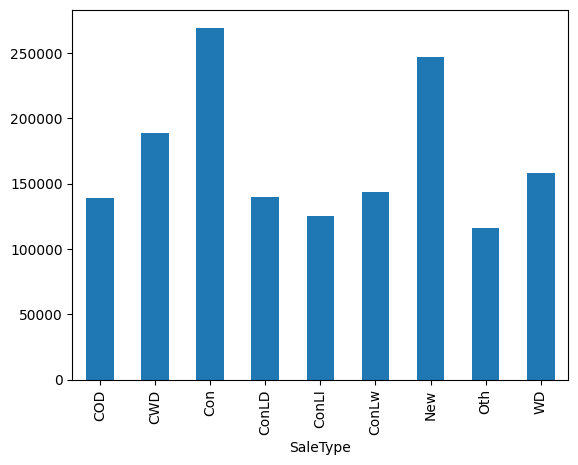

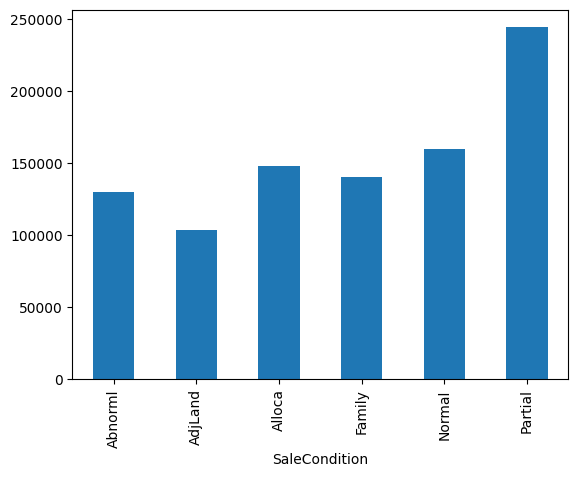

In [18]:
for i in categorical_col:
    dataset=df.copy()
    dataset.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.show()